# Problem 1

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

data = np.genfromtxt('global-temperatures.csv')

print(data)

[[1880.           13.5725    ]
 [1881.           13.59916667]
 [1882.           13.685     ]
 [1883.           13.67166667]
 [1884.           13.395     ]
 [1885.           13.535     ]
 [1886.           13.38916667]
 [1887.           13.32416667]
 [1888.           13.5375    ]
 [1889.           13.81333333]
 [1890.           13.455     ]
 [1891.           13.46583333]
 [1892.           13.5175    ]
 [1893.           13.50083333]
 [1894.           13.61      ]
 [1895.           13.67833333]
 [1896.           13.71333333]
 [1897.           13.81166667]
 [1898.           13.63916667]
 [1899.           13.71      ]
 [1900.           13.85583333]
 [1901.           13.87333333]
 [1902.           13.66916667]
 [1903.           13.60916667]
 [1904.           13.4975    ]
 [1905.           13.67666667]
 [1906.           13.785     ]
 [1907.           13.48583333]
 [1908.           13.63      ]
 [1909.           13.61666667]
 [1910.           13.68083333]
 [1911.           13.65166667]
 [1912. 

Slope: 0.009431039744529385
Intercept: -4.337443744147867


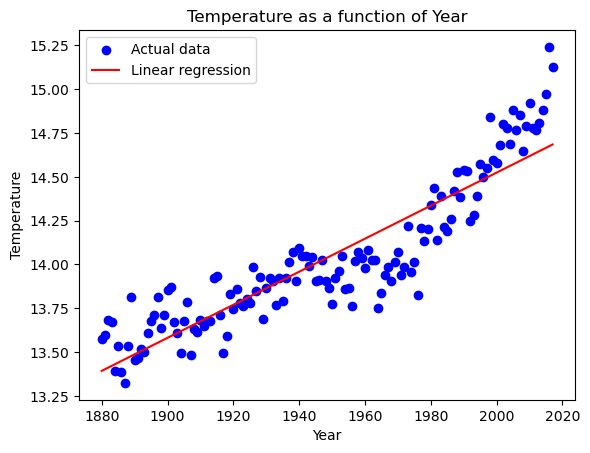

Predicted temperature for 2025: 14.760411738524136


In [3]:

# a)

# Separate the data into X (years) and y (temperature)
years = data[:, 0].reshape(-1, 1)  # Reshape for scikit-learn
temp = data[:, 1]

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(years, temp)

# Get the slope and intercept of the linear regression line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Predict temperatures
temp_pred = model.predict(years)

# Plot the data and the linear regression line
plt.scatter(years, temp, color='blue', label='Actual data')
plt.plot(years, temp_pred, color='red', label='Linear regression')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature as a function of Year')
plt.legend()
plt.show()

# Predict temperature for a specific year, say 2025
year_2025 = np.array([[2025]])
temperature_2025 = model.predict(year_2025)
print(f"Predicted temperature for 2025: {temperature_2025[0]}")

The R² value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, where:

0 indicates that the model explains none of the variability of the response data around its mean.
1 indicates that the model explains all the variability of the response data around its mean.
In essence, a higher R² value indicates a better fit of the model to the data.

In [4]:
r2 = model.score(years, temp)

print(r2)

0.8145436075330897


The estimator $\beta_1$ represents the estimated slope of the regression line.

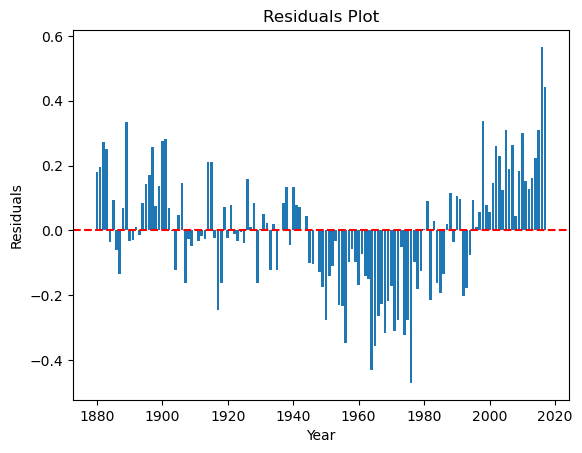

In [5]:

#d
residuals = temp - temp_pred

plt.bar(years.flatten(), residuals.flatten())
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



# Problem 3

In [10]:

# Load the dataset without column names
data = pd.read_csv('auto-mpg.csv', header=None, comment='#', delim_whitespace=True)

# Assign appropriate column names
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Prepare the data
X = data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]
y = data['mpg']

# Handle missing values if any
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Implement the function to estimate linear regression parameters
def estimate_parameters(X, y):
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Compute the parameters using the Normal Equation
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return beta

# Fit the regression model to the data
beta = estimate_parameters(X, y)

# Print the estimated parameters
print("Estimated parameters:", beta)

Estimated parameters: [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]


In [11]:
from sklearn.preprocessing import StandardScaler

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the function to estimate linear regression parameters
def estimate_parameters(X, y):
    # Add a column of ones to X for the intercept term
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Compute the parameters using the Normal Equation
    X_transpose = X.T
    beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return beta

# Fit the regression model to the standardized data
beta = estimate_parameters(X_scaled, y)

# Print the estimated parameters
print("Estimated parameters:", beta)

Estimated parameters: [ 2.34459184e+01 -5.61949961e-01  8.02476155e-01 -1.50445038e-02
 -5.76399971e+00  2.34957037e-01  2.77166415e+00]


In [13]:
r2 = model.score(X_scaled[:, 0].reshape(-1, 1), y)
print("R2 value:", r2)

R2 value: -12.705642514763085


In [14]:
from sklearn.metrics import r2_score

# Function to fit the model and print results
def fit_and_evaluate(X, y):
    beta = estimate_parameters(X, y)
    y_pred = np.dot(np.c_[np.ones(X.shape[0]), X], beta)
    r2 = r2_score(y, y_pred)
    print("Estimated parameters:", beta)
    print("R² value:", r2)
    print()

# Fit the model with all predictors
print("Model with all predictors:")
fit_and_evaluate(X, y)

# List of predictors
predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

# Experiment by removing each predictor one at a time
for predictor in predictors:
    print(f"Model without {predictor}:")
    X_reduced = X.drop(columns=[predictor])
    fit_and_evaluate(X_reduced, y)

Model with all predictors:
Estimated parameters: [-1.45352505e+01 -3.29859089e-01  7.67843024e-03 -3.91355574e-04
 -6.79461791e-03  8.52732469e-02  7.53367180e-01]
R² value: 0.8092552890383932

Model without cylinders:
Estimated parameters: [-1.54353143e+01  2.78168607e-03  1.02013300e-03 -6.87377956e-03
  9.03235870e-02  7.54115341e-01]
R² value: 0.8087665240097105

Model without displacement:
Estimated parameters: [-1.50983311e+01 -9.76327127e-02  3.03849578e-03 -6.48639751e-03
  7.34632941e-02  7.49321444e-01]
R² value: 0.808715718482058

Model without horsepower:
Estimated parameters: [-1.46006210e+01 -3.28894338e-01  7.62899816e-03 -6.80308062e-03
  8.71010402e-02  7.53704232e-01]
R² value: 0.8092548926864622

Model without weight:
Estimated parameters: [-5.08143851 -0.73046829 -0.02521153 -0.0630495  -0.41396123  0.66394287]
R² value: 0.7583054486289865

Model without acceleration:
Estimated parameters: [-1.27794934e+01 -3.43689987e-01  6.99644689e-03 -7.71486134e-03
 -6.52445347